In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('Superstore-Data.csv',encoding='windows-1254')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [22]:
df.duplicated().sum()

0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [24]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [25]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [26]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format='%m/%d/%Y')
df["Order Date"] = pd.to_datetime(df["Order Date"], format='%m/%d/%Y')
df["Delivery time (Days)"] = (df["Ship Date"] - df["Order Date"]).dt.days

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9994 non-null   int64         
 1   Order ID              9994 non-null   object        
 2   Order Date            9994 non-null   datetime64[ns]
 3   Ship Date             9994 non-null   datetime64[ns]
 4   Ship Mode             9994 non-null   object        
 5   Customer ID           9994 non-null   object        
 6   Customer Name         9994 non-null   object        
 7   Segment               9994 non-null   object        
 8   Country               9994 non-null   object        
 9   City                  9994 non-null   object        
 10  State                 9994 non-null   object        
 11  Postal Code           9994 non-null   int64         
 12  Region                9994 non-null   object        
 13  Product ID        

In [28]:
df.to_csv('preprocessed_data.csv', index=False)

### **Model Preparation**

In [40]:
data = df.copy()

In [41]:
data.drop(["Row ID","Order ID","Customer ID","Customer Name","Postal Code","Country","Product ID","Product Name","Order Date","Ship Date"],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ship Mode             9994 non-null   object 
 1   Segment               9994 non-null   object 
 2   City                  9994 non-null   object 
 3   State                 9994 non-null   object 
 4   Region                9994 non-null   object 
 5   Category              9994 non-null   object 
 6   Sub-Category          9994 non-null   object 
 7   Sales                 9994 non-null   float64
 8   Quantity              9994 non-null   int64  
 9   Discount              9994 non-null   float64
 10  Profit                9994 non-null   float64
 11  Delivery time (Days)  9994 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 937.1+ KB


In [42]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ship Mode             9994 non-null   int64  
 1   Segment               9994 non-null   int64  
 2   City                  9994 non-null   int64  
 3   State                 9994 non-null   int64  
 4   Region                9994 non-null   int64  
 5   Category              9994 non-null   int64  
 6   Sub-Category          9994 non-null   int64  
 7   Sales                 9994 non-null   float64
 8   Quantity              9994 non-null   int64  
 9   Discount              9994 non-null   float64
 10  Profit                9994 non-null   float64
 11  Delivery time (Days)  9994 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 937.1 KB


In [43]:
from scipy.stats import pearsonr, chi2_contingency

# Assuming your DataFrame is called 'data'
target = 'Profit'

# Separate numerical and categorical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# 1. Pearson correlation for numerical features
print("P-value tests for numerical features:")
for feature in numerical_features:
    if feature != target:
        corr, p_value = pearsonr(data[feature], data[target])
        print(f"Feature: {feature}, Pearson Correlation: {corr}, P-value: {p_value}")

P-value tests for numerical features:
Feature: Ship Mode, Pearson Correlation: -0.006618905802415872, P-value: 0.5082170534640931
Feature: Segment, Pearson Correlation: 0.013354944837869294, P-value: 0.18188082789257348
Feature: City, Pearson Correlation: 0.024217312394646723, P-value: 0.015475457965707784
Feature: State, Pearson Correlation: -0.02531495810001283, P-value: 0.01137945286921904
Feature: Region, Pearson Correlation: 0.022216252656237032, P-value: 0.026354012013596582
Feature: Category, Pearson Correlation: 0.09150578842469212, P-value: 4.9124508588493496e-20
Feature: Sub-Category, Pearson Correlation: -0.0295029119708524, P-value: 0.0031810414738233646
Feature: Sales, Pearson Correlation: 0.4790643497377061, P-value: 0.0
Feature: Quantity, Pearson Correlation: 0.06625318912428485, P-value: 3.361709415895388e-11
Feature: Discount, Pearson Correlation: -0.21948745637176847, P-value: 2.702294436198942e-109
Feature: Delivery time (Days), Pearson Correlation: -0.00464935314415

In [45]:
# Drop insignificant features
features_to_drop = ['Ship Mode', 'Segment', 'Delivery time (Days)']
data = data.drop(columns=features_to_drop)

# Display the cleaned data
print(data.head())


   City  State  Region  Category  Sub-Category     Sales  Quantity  Discount  \
0   194     15       2         0             4  261.9600         2      0.00   
1   194     15       2         0             5  731.9400         3      0.00   
2   266      3       3         1            10   14.6200         2      0.00   
3   153      8       2         0            16  957.5775         5      0.45   
4   153      8       2         1            14   22.3680         2      0.20   

     Profit  
0   41.9136  
1  219.5820  
2    6.8714  
3 -383.0310  
4    2.5164  


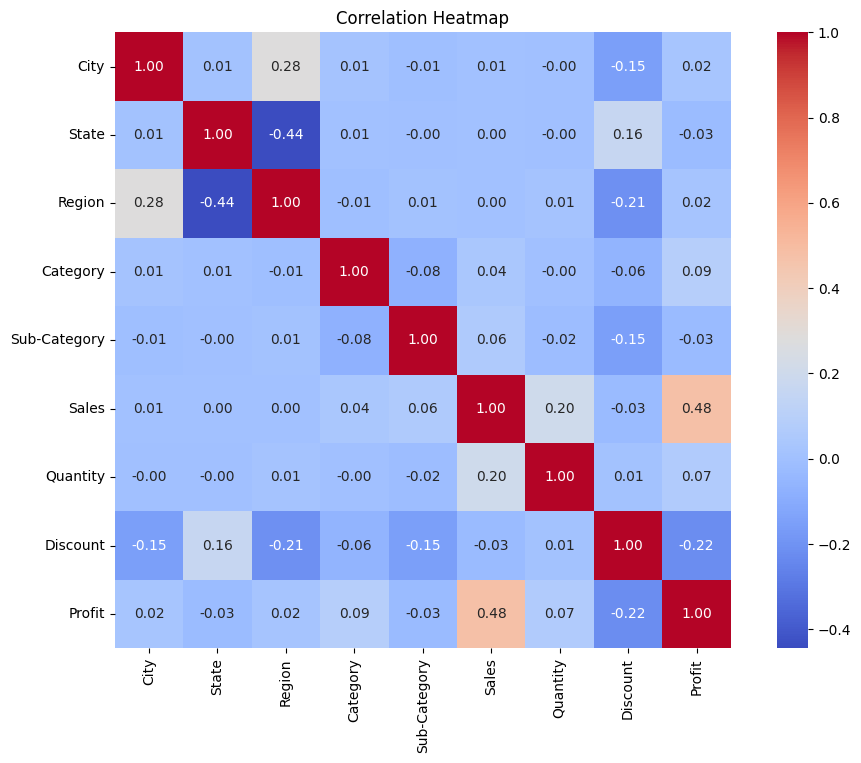

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)

# Title and labels
plt.title('Correlation Heatmap')
plt.show()

In [47]:
data.to_csv('modelPrepare_data.csv', index=False)